Multinomial/softmax regression is used for multi-class classification

### Softmax Regression

# 🎯 Softmax & Multinomial Logistic Regression

---

## 🧮 Softmax Function

### ✨ Formula
$\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$

**Where:**
- $z_i$ = raw score (logit) for class $i$  
- $K$ = number of classes
- **Output:** probability distribution over $K$ classes

### 🎯 Properties
| Property | Description |
|----------|-------------|
| **Range** | $(0, 1)$ for each class |
| **Sum** | $\sum_{i=1}^{K} P(\text{class}_i) = 1$ |
| **Differentiable** | ✅ Perfect for gradient descent |
| **Monotonic** | Higher logit → Higher probability |

---

## 📊 Step-by-Step Example

```
🎲 Raw Scores (Logits): [2.0, 1.0, 0.1]

📈 Step 1: Exponentiate
   e^2.0 = 7.39
   e^1.0 = 2.72  
   e^0.1 = 1.11

📊 Step 2: Sum = 7.39 + 2.72 + 1.11 = 11.22

🎯 Step 3: Normalize
   P(class₁) = 7.39/11.22 = 0.659 (65.9%)
   P(class₂) = 2.72/11.22 = 0.242 (24.2%)  
   P(class₃) = 1.11/11.22 = 0.099 (9.9%)
```

---

## 🔥 Multinomial Logistic Regression

### 🏗️ Architecture
```
Input Features (x) → Linear Layers → Logits (z) → Softmax → Probabilities
```

### 📐 Linear Model
$z_i = \mathbf{w_i^T x} + b_i$

For $K$ classes: $K$ weight vectors $\mathbf{w_i}$ and biases $b_i$

### 🎯 Final Prediction
$P(y=i|\mathbf{x}) = \frac{e^{\mathbf{w_i^T x} + b_i}}{\sum_{j=1}^{K} e^{\mathbf{w_j^T x} + b_j}}$

---

## 📉 Loss Function: Cross-Entropy

### 🔢 Formula
$\mathcal{L} = -\sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \log(\hat{p}_{ij})$

**Where:**
- $y_{ij}$ = 1 if sample $i$ belongs to class $j$, else 0
- $\hat{p}_{ij}$ = predicted probability for sample $i$, class $j$

### 🎯 Simplified (One-Hot)
$\mathcal{L} = -\sum_{i=1}^{N} \log(\hat{p}_{i,\text{true class}})$

---

## ⚖️ Softmax vs Sigmoid

| Aspect | Softmax | Sigmoid |
|--------|---------|---------|
| **Classes** | Multi-class (K > 2) | Binary (K = 2) |
| **Output** | $\sum P_i = 1$ | Each $P_i$ independent |
| **Use Case** | Exclusive classes | Multi-label possible |
| **Formula** | $\frac{e^{z_i}}{\sum e^{z_j}}$ | $\frac{1}{1+e^{-z}}$ |

---

## 💡 Key Insights

### 🌡️ Temperature Scaling
$\sigma(z_i) = \frac{e^{z_i/T}}{\sum_{j=1}^{K} e^{z_j/T}}$

| Temperature | Effect |
|-------------|--------|
| $T > 1$ | **Softer** probabilities (more uncertain) |
| $T < 1$ | **Sharper** probabilities (more confident) |
| $T = 1$ | Standard softmax |

### ⚡ Numerical Stability
```python
# ❌ Unstable
def softmax_naive(x):
    return np.exp(x) / np.sum(np.exp(x))

# ✅ Stable  
def softmax_stable(x):
    x_max = np.max(x)
    return np.exp(x - x_max) / np.sum(np.exp(x - x_max))
```

---

## 💻 Implementation

```python
import numpy as np
from sklearn.linear_model import LogisticRegression

# 🎯 Manual Softmax
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))  # Stability
    return exp_logits / np.sum(exp_logits)

# 📊 Sklearn Implementation
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)

# 🔥 PyTorch
import torch.nn.functional as F
probabilities = F.softmax(logits, dim=1)
```

---

## 🎲 Decision Rule

$\hat{y} = \arg\max_{i} P(y=i|\mathbf{x})$

**Choose class with highest probability**

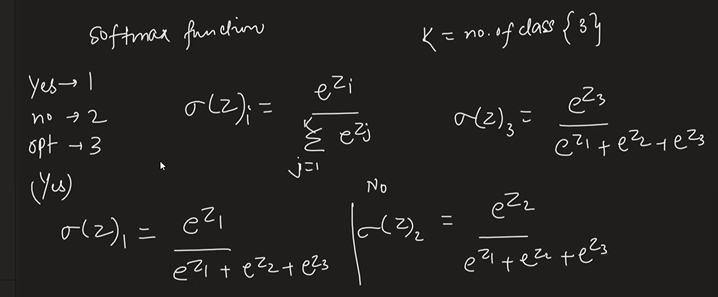

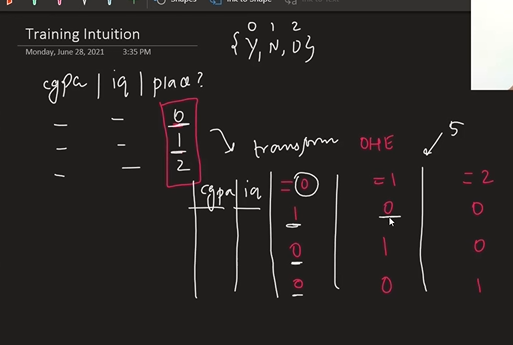

Split it into multiple columns to make it binary. The same as one hot encoding

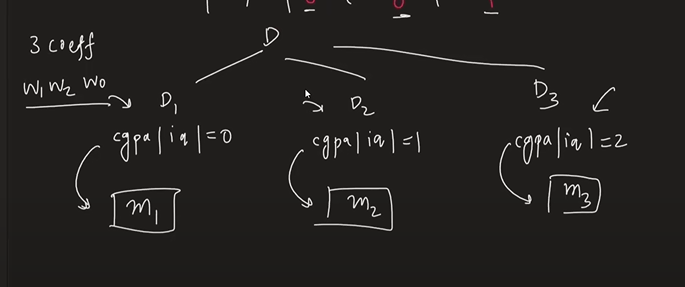

Split the data into 3 parts for each class separately and train 3 separate models

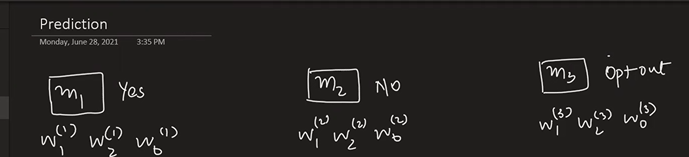

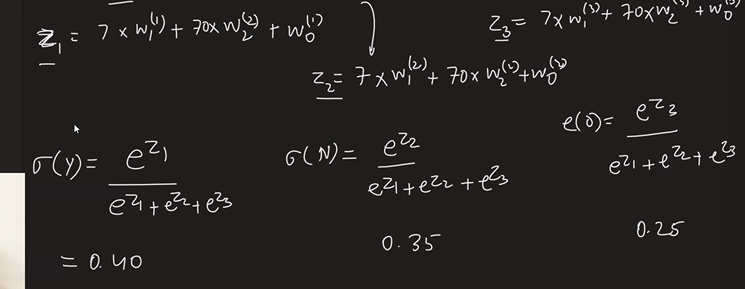

We calculate the z value for all the three models. Then, make a softmax out of all the z values we got. We then select the one with the highest probability

Problem with this approach is that creating too many models will be slow and inefficient

So, we change the loss function

### Loss Function

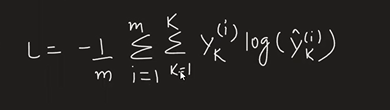

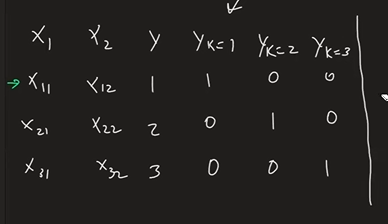
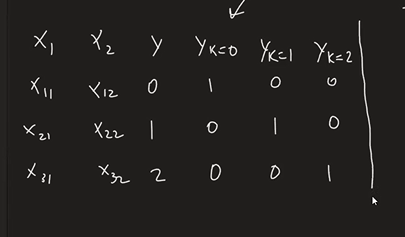

m = no of training samples

k = no of classes

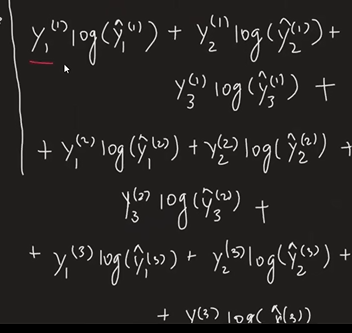

Many of the above terms will be zero

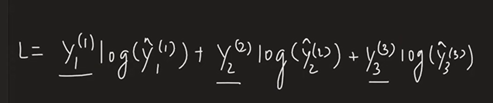

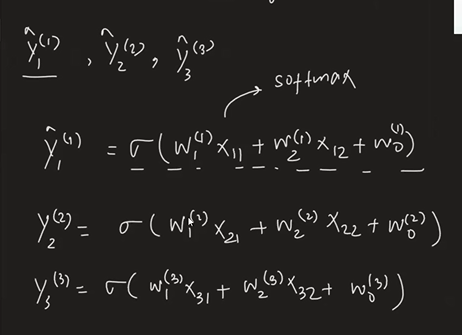

In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df = df[['sepal_length','petal_length','species']]

In [7]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
clf = LogisticRegression(multi_class='multinomial')

In [11]:
clf.fit(X_train,y_train)

c:\Users\SYED NAVEED\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [12]:
y_pred = clf.predict(X_test)

In [13]:
print(accuracy_score(y_test,y_pred)*100)

96.66666666666667


In [14]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [15]:
# prediction
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

c:\Users\SYED NAVEED\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25865651e-01, 2.73720718e-01, 4.13631316e-04]])

In [16]:
clf.predict(query)

c:\Users\SYED NAVEED\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

c:\Users\SYED NAVEED\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


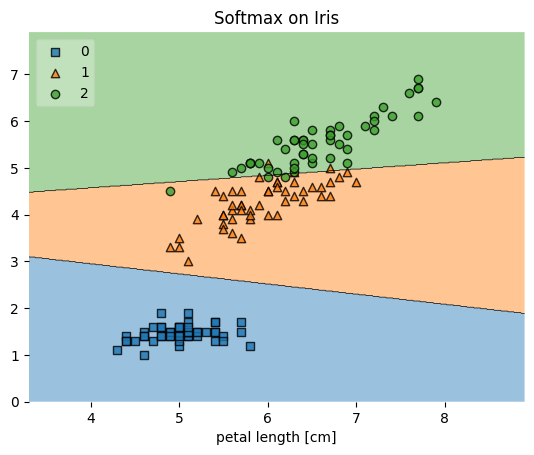

In [17]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()